In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Read the dataset and view it
data=pd.read_csv('/content/drive/MyDrive/Drug side effects data.csv')

In [4]:
data.head()

,Name,Gender,Age,Race,Drug_Name,Side_Effect
0,Julie Cunningham,Male,41.0,White,topamax,Mild Side Effects
1,Seth Frey,Male,53.0,"Hispanic, White",zocor,Extremely Severe Side Effects
2,Timothy Thomas,Female,31.0,White,tazorac,Mild Side Effects
3,Evelyn Peters,Female,44.0,White,voltaren,Severe Side Effects
4,Andre Richards,Male,24.0,White,tramadol,No Side Effects


# Exploratory data analysis

In [5]:
# To find the shape of the dataset
data.shape

(400000, 6)

In [6]:
# To find basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         400000 non-null  object 
 1   Gender       399836 non-null  object 
 2   Age          399980 non-null  float64
 3   Race         400000 non-null  object 
 4   Drug_Name    400000 non-null  object 
 5   Side_Effect  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


**Analysis of Numerical feature**

In [7]:
##Selecting numerical features
numerical_data = data.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 1 numerical features: 

['Age']


In [8]:
# To find statistical summary
data.describe()

,Age
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


Histogram

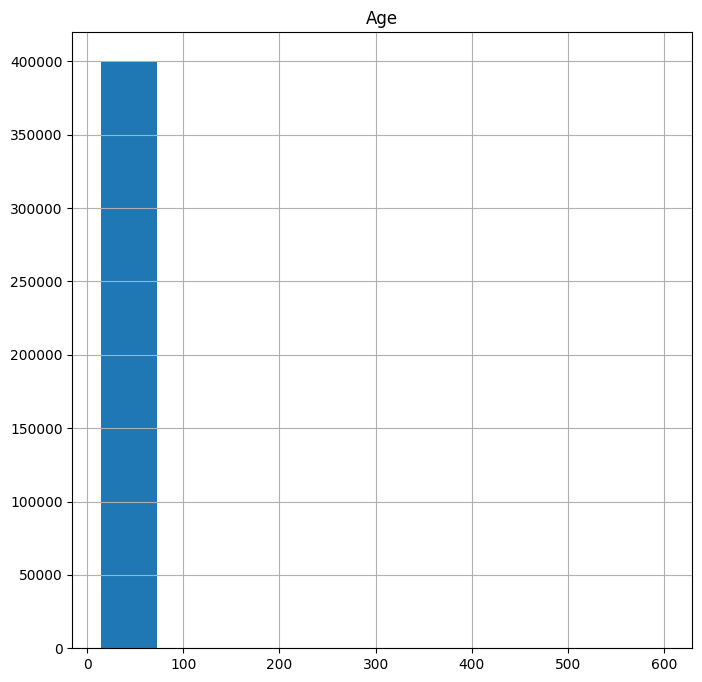

In [9]:
# To find distribution of numerical feature 'Age'
numerical_data.hist(figsize=(8,8))
plt.show()

Number Unique values in each feature

In [10]:
numerical_data.nunique()

Age    80
dtype: int64

**Observations**

1.There are 80 unique values in 'Age' column.

2.The distribution of 'Age' column is close to normal.

**Analysis of categorical features**

In [11]:
#Selecting categoricalfeatures
categorical_data=data.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 categorical features: 

['Name', 'Gender', 'Race', 'Drug_Name', 'Side_Effect']


In [12]:
#Summary satistics of Categorical features
categorical_data.describe(include='object')

,Name,Gender,Race,Drug_Name,Side_Effect
count,400000,399836,400000,400000,400000
unique,192596,3,9,502,5
top,Michael Johnson,Male,White,paxil,Mild Side Effects
freq,144,133617,314074,6269,133236


Bar plots of value counts of each categorical features

(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

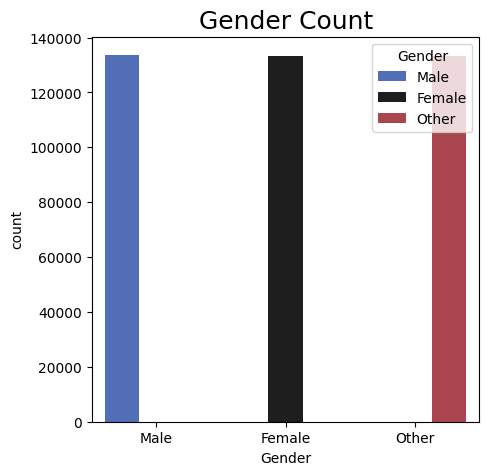

In [13]:
## Plotting a count plot on 'Gender'
data['Gender'].value_counts()
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=data,palette="icefire",hue='Gender')
plt.title("Gender Count",fontsize=18)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic, White'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic, Black'),
  Text(6, 0, 'Asian, Other'),
  Text(7, 0, 'Asian Indian'),
  Text(8, 0, 'Chinese')])

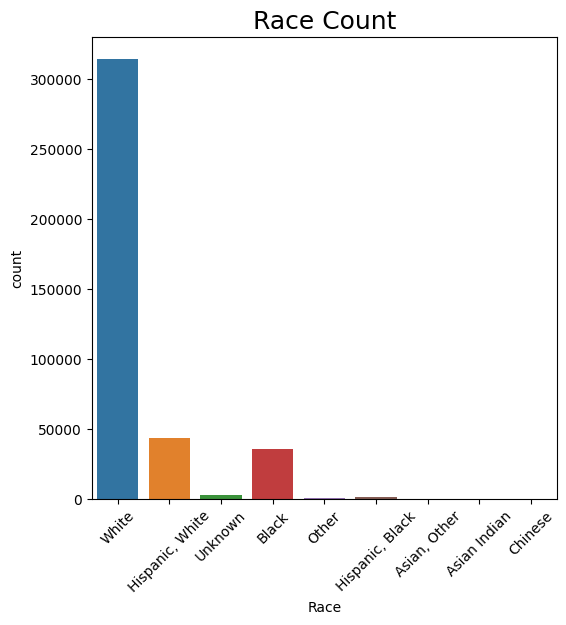

In [14]:
## Plotting a count plot on 'Race'
data["Race"].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='Race',data=data)
plt.title("Race Count",fontsize=18 )
plt.xticks(rotation=45)

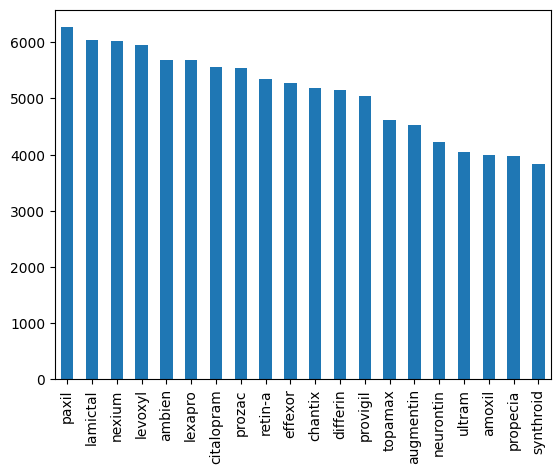

In [15]:
## Count plot of the top 20 drugs in the data
data['Drug_Name'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [16]:
data['Drug_Name'].value_counts().head(20)

paxil         6269
lamictal      6045
nexium        6029
levoxyl       5958
ambien        5692
lexapro       5691
citalopram    5560
prozac        5533
retin-a       5340
effexor       5276
chantix       5182
differin      5149
provigil      5051
topamax       4617
augmentin     4528
neurontin     4225
ultram        4042
amoxil        3993
propecia      3972
synthroid     3838
Name: Drug_Name, dtype: int64

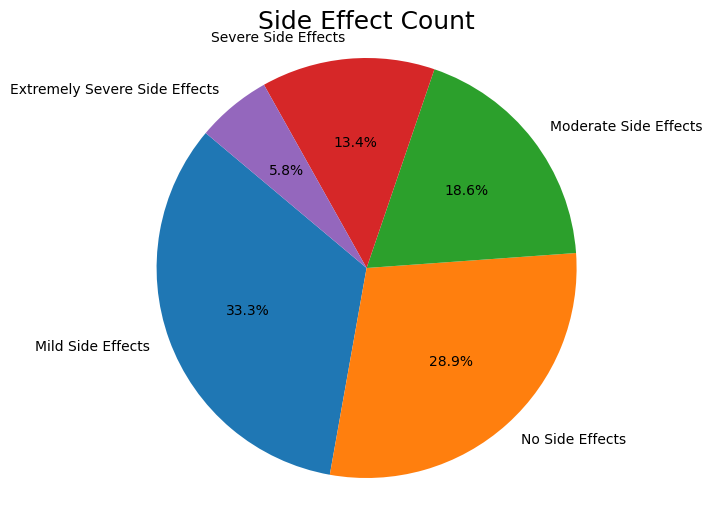

In [17]:
## Plotting a pie chart on the 'SIDE EFFECTS'
plt.figure(figsize=(8, 6))
plt.pie(data['Side_Effect'].value_counts(), labels=data['Side_Effect'].value_counts().keys(), autopct='%1.1f%%', startangle=140)
plt.title('Side Effect Count', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

plt.show()

**Observations**

1.All categorical features except 'Name' contains large number of non unique values.

2.The top popular drug in the data is 'paxil'.

3.Most of the persons are from white background.

4.Most of the people suffer mild side effects.

# Data Preprocessing

**To find missing values**

In [18]:
data.isna().sum()

Name             0
Gender         164
Age             20
Race             0
Drug_Name        0
Side_Effect      0
dtype: int64

To fill missing values in numerical column 'Age' , here we use median.

In [19]:
median_value = data['Age'].median()

# Fill missing values with the median value
data['Age'].fillna(median_value, inplace=True)

To fill missing values in categorical column 'Gender' We use mode.

In [20]:
# Calculate the mode of the Gender column
mode_value = data['Gender'].mode()[0]  # Using [0] to get the first mode (in case there are multiple)

# Fill missing values with the mode
data['Gender'].fillna(mode_value, inplace=True)

In [21]:
# Check the number of missing values after imputation
data.isnull().sum()


Name           0
Gender         0
Age            0
Race           0
Drug_Name      0
Side_Effect    0
dtype: int64

**Outlier detection**

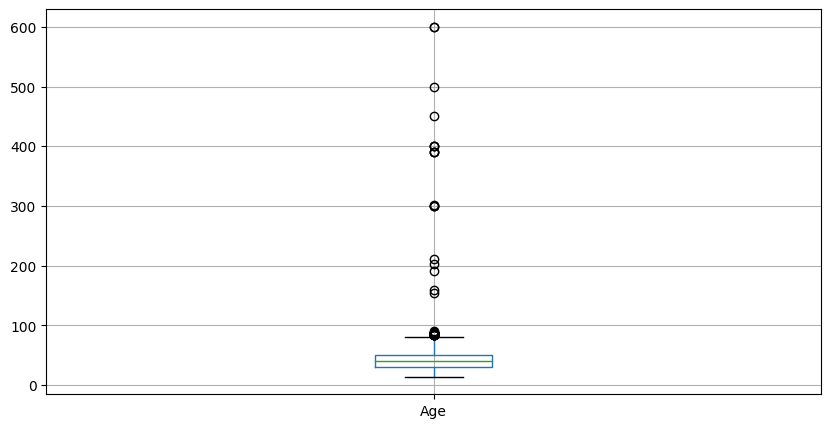

In [22]:
## Finding outliers
graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(10,5))
plt.show()

There are some outliers present in Numerical column 'Age'.

In [23]:
# Let us calculate the interquartile range for outlier treatment.
Q1=np.percentile(data['Age'],25)

In [24]:
Q3=np.percentile(data['Age'],75)

In [25]:
IQR=Q3-Q1

In [26]:
IQR

20.0

In [27]:
# Now calculate the upper and lower limits
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [28]:
low_limit

1.0

In [29]:
upr_limit

81.0

In [30]:
# Now let us calculate outliers and their index numbers.
outlier=[]
for x in data['Age']:
  if x>upr_limit or x<low_limit:
    outlier.append(x)

In [31]:
outlier

[300.0,
 302.0,
 87.0,
 90.0,
 84.0,
 500.0,
 400.0,
 87.0,
 203.0,
 160.0,
 400.0,
 87.0,
 87.0,
 191.0,
 450.0,
 390.0,
 84.0,
 87.0,
 84.0,
 155.0,
 300.0,
 87.0,
 87.0,
 84.0,
 390.0,
 87.0,
 84.0,
 600.0,
 84.0,
 84.0,
 87.0,
 84.0,
 211.0,
 600.0,
 401.0,
 89.0,
 300.0,
 390.0]

In [32]:
ind=data['Age']>upr_limit
data.loc[ind].index

Int64Index([  3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
            111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
            186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
            264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
            325631, 333669, 337790, 363934, 384352, 393820],
           dtype='int64')

In [33]:
# Dropping these rows containing outliers
data.drop([3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
            111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
            186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
            264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
            325631, 333669, 337790, 363934, 384352, 393820],inplace=True)

Text(0.5, 1.0, 'Boxplot for age')

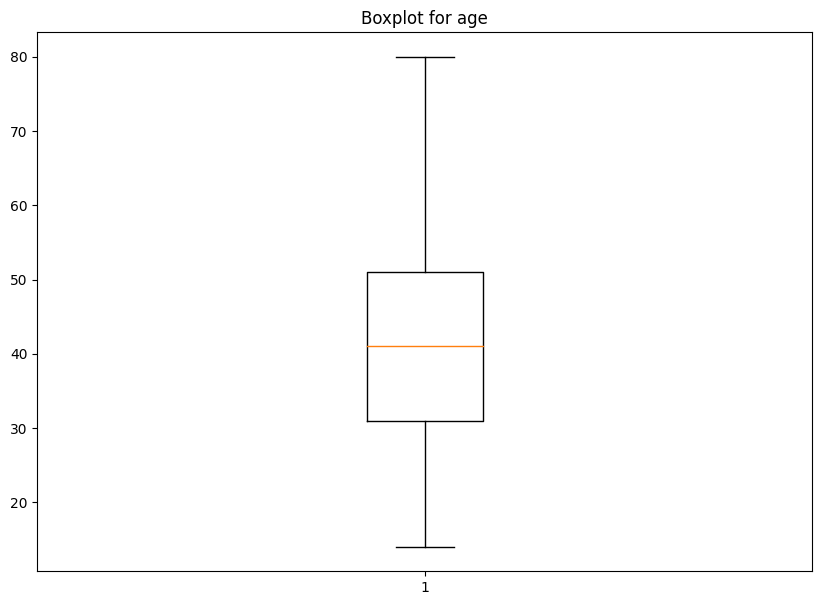

In [34]:
plt.boxplot(data['Age'])
plt.title('Boxplot for age')

Outliers are properly treated.

In [35]:
## Dropping the  attribute ‘NAME’ as it doesn't give any contribution to the modeling.
data=data.drop(['Name'],axis=1)
data.head()

,Gender,Age,Race,Drug_Name,Side_Effect
0,Male,41.0,White,topamax,Mild Side Effects
1,Male,53.0,"Hispanic, White",zocor,Extremely Severe Side Effects
2,Female,31.0,White,tazorac,Mild Side Effects
3,Female,44.0,White,voltaren,Severe Side Effects
4,Male,24.0,White,tramadol,No Side Effects


**Encoding**

In [36]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
attr = []
for i in data.columns:
    if data[i].dtype == 'object':
        attr.append(i)

for i in attr:
    data[i] = le.fit_transform(data[i])

In [38]:
data.head()

,Gender,Age,Race,Drug_Name,Side_Effect
0,1,41.0,8,435,1
1,1,53.0,5,491,0
2,0,31.0,8,425,1
3,0,44.0,8,470,4
4,1,24.0,8,439,3


**Correlation heatmap**

<Axes: >

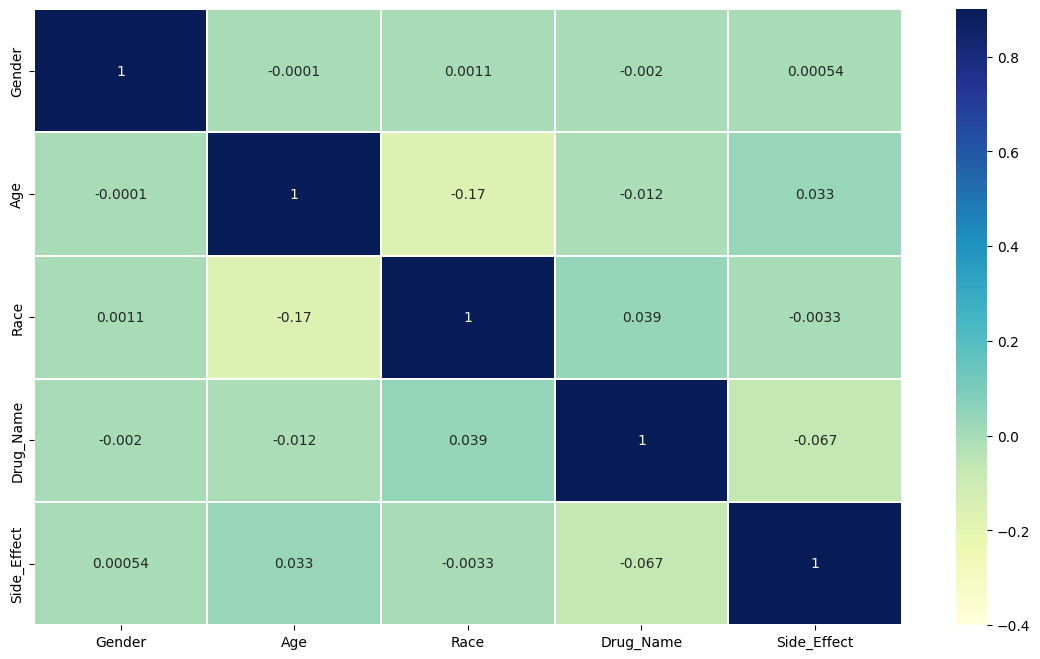

In [39]:
## Plotting a correlation heatmap
corrmatrix = data.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

**Min Max Scaling**

Lets split the data into x and y

In [40]:
x = data.drop('Side_Effect',axis=1)

In [41]:
y = data['Side_Effect']

In [42]:
# Import min max scaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

In [44]:
# Fit and transform the data to perform Min-Max scaling
x_scaled = scaler.fit_transform(x)

In [45]:
# Convert data from array to dataframe
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [46]:
x_scaled.head()

,Gender,Age,Race,Drug_Name
0,0.5,0.409091,1.000,0.868263
1,0.5,0.590909,0.625,0.980040
2,0.0,0.257576,1.000,0.848303
3,0.0,0.454545,1.000,0.938124
4,0.5,0.151515,1.000,0.876248


# Train test split

In [47]:
# Import train test split
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

# Modelling using different algorithms

**Logistic Regression Model**

In [49]:
# Importing logistic regression from scikit learn
from sklearn.linear_model import LogisticRegression

In [50]:
# Importing accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [52]:
# Make predictions on the test set
lr_y_pred = lr_model.predict(x_test)

In [53]:
# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Logistic Regression:
Accuracy: 0.3189087017831605
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5740
           1       0.33      0.88      0.48     33039
           2       0.00      0.00      0.00     18833
           3       0.25      0.09      0.13     28869
           4       0.00      0.00      0.00     13510

    accuracy                           0.32     99991
   macro avg       0.11      0.20      0.12     99991
weighted avg       0.18      0.32      0.20     99991



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest Model**

In [54]:
# Importing Random forest classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Train the Random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Make predictions on the test set.
rf_y_pred = rf_model.predict(x_test)

In [57]:
# Evaluate the model
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Random Forest:
Accuracy: 0.9845086057745197
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5740
           1       0.98      0.99      0.99     33039
           2       0.98      0.98      0.98     18833
           3       0.99      0.99      0.99     28869
           4       0.99      0.99      0.99     13510

    accuracy                           0.98     99991
   macro avg       0.98      0.98      0.98     99991
weighted avg       0.98      0.98      0.98     99991



**Decision Tree Model**

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
# Make predictions on the test set
dt_y_pred = dt_model.predict(x_test)

In [61]:
# Evaluate the model
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Decision Tree:
Accuracy: 0.986308767789101
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5740
           1       0.98      0.99      0.99     33039
           2       0.98      0.98      0.98     18833
           3       0.99      0.99      0.99     28869
           4       0.99      0.99      0.99     13510

    accuracy                           0.99     99991
   macro avg       0.98      0.98      0.98     99991
weighted avg       0.99      0.99      0.99     99991



**KNN Model**

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# create an empty list.
metric_k=[]
neighbors=np.arange(3,15)

In [64]:
# Train the KNN model
for k in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_model.fit(x_train,y_train)
  # Make predictions on the test set
  knn_y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,knn_y_pred)
  metric_k.append(acc)

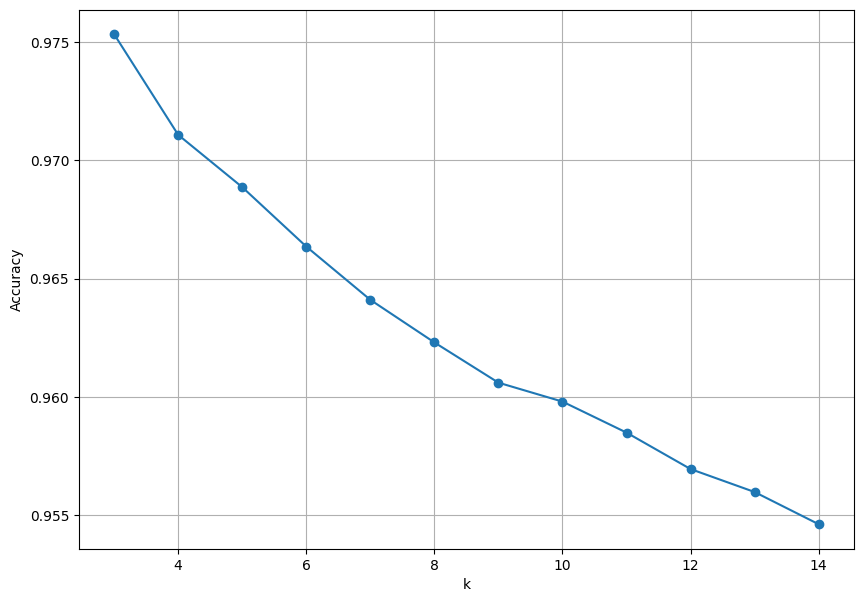

In [65]:
# Lets plot a graph to find highest accuracy score of given k
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [66]:
# Lets create knn model for 3 neighbors
knn_model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [67]:
# Make predictions on the test set
knn_y_pred=knn_model.predict(x_test)

In [68]:
# Evaluate the model
print("KNN Model:")
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

KNN Model:
Accuracy: 0.975327779500155
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5740
           1       0.97      0.98      0.98     33039
           2       0.98      0.96      0.97     18833
           3       0.97      0.98      0.98     28869
           4       0.98      0.98      0.98     13510

    accuracy                           0.98     99991
   macro avg       0.97      0.97      0.97     99991
weighted avg       0.98      0.98      0.98     99991



**Gaussian Naive Bayes Model**

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
# Create a Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

In [71]:
# Train the classifier on the training data
gnb_model.fit(x_train, y_train)

GaussianNB()

In [72]:
# Make predictions on the test data
gnb_y_pred = gnb_model.predict(x_test)

In [73]:
# Evaluate the model
print("GNB Model:")
print("Accuracy:", accuracy_score(y_test, gnb_y_pred))
print(classification_report(y_test, gnb_y_pred))

GNB Model:
Accuracy: 0.33629026612395113
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5740
           1       0.35      0.51      0.41     33039
           2       0.27      0.08      0.12     18833
           3       0.33      0.53      0.41     28869
           4       0.00      0.00      0.00     13510

    accuracy                           0.34     99991
   macro avg       0.19      0.22      0.19     99991
weighted avg       0.26      0.34      0.28     99991



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


•	Comparing all five models, the best model is Decision tree model.
•	The accuracy score of Decision tree model is 0.986 which is the highest of all five models.


# Fine tuning of Decision tree model

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
# Define the hyperparameter grid with the ranges to sample from
param_dist = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 11)),
    'criterion': ['gini', 'entropy']
}

In [76]:
dt_model = DecisionTreeClassifier(random_state=42)

In [77]:
# Perform random search
random_search = RandomizedSearchCV( dt_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random samples to try
    cv=5,  # Number of cross-validation folds
    random_state=42  # Set a random seed for reproducibility
)

In [78]:
# Fit the random search to your training data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=42)

In [79]:
# Get the best hyperparameters and estimator
best_params = random_search.best_params_
best_dt = random_search.best_estimator_

In [80]:
# Print best parameters
print("Best parameters:", best_params)

Best parameters: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}


In [81]:
# Make predictions
predictions = best_dt.predict(x_test)

In [82]:
# Evaluate the model
print("Randomsearch Model:")
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Randomsearch Model:
Accuracy: 0.98619875788821
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5740
           1       0.98      0.99      0.99     33039
           2       0.98      0.98      0.98     18833
           3       0.99      0.99      0.99     28869
           4       0.99      0.99      0.99     13510

    accuracy                           0.99     99991
   macro avg       0.98      0.98      0.98     99991
weighted avg       0.99      0.99      0.99     99991



After fine tuning, accuracy is similar to the model.Thus it is proved that decision tree classifier is the best model.